In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt




In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/"

In [3]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [4]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [5]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [6]:
df = pd.read_csv(dir_origen_csv + "sera.csv", low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-04 18:28:45,15029835,1144934,123.8179,122.0391,125.7861,0.0013,0.0016,0.0110,A3,...,-79.4733,IGLESIA,0.1440,0.0000,bajo,7,0,0,0.072000,14
7,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
8,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
9,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14


In [7]:
max(df.fecha)

Timestamp('2019-06-03 19:56:55')

In [8]:
min(df.fecha)

Timestamp('2019-04-04 06:02:05')

In [9]:
df.set_index("fecha", inplace = True)

In [10]:
df = df[df.index.dayofweek < 4]

In [57]:
Series = []
count = 0
missing_count = 0

for n,g in df.groupby(["medidor", df.index.day, df.index.month]):
    #g.set_index("fecha", inplace = True)

    g = g.resample("2h").mean()
    #g.dropna(inplace = True)
    #print(g.isna().sum().sum()
    date = (g.index.date[0])

    idx = pd.date_range(date, periods=12, freq='2H')
    #print(idx)
    s = pd.Series(np.nan, index = idx)
    s = s.loc[(s.index.hour >= 6) & (s.index.hour <= 18)]
    #print(s)
    w = g["kwh_consumido"]
    w = w.add(s, fill_value =0)
    w = w.interpolate(method = "time", limit_direction = "both")
    #g["kwh_consumido"] = g["kwh_consumido"].add(s, fill_value = 1)
    #g["kwh_consumido"] = g["kwh_consumido"].interpolate(method = "time", limit_direction = "both")
    g["kwh_consumido"] = w
    
    
    #g.fillna(method = "bfill", inplace = True)
    #print(g)

    Series.append(g)
    #print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
    if (g.isnull().sum().sum() != 0):
        print(count)
    #print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
 
    count +=1

1
7
20
40
46
53
58
127
130
132
134
135
167
172
186
189
193
215
220
247
266
269
271
272
288
295
297
300
301
304
305
306
309
310
325
326
336
339
345
347
349
352
354
358
359
367
374
380
381
383
388
392
394
402
405
407
417
429
448
451
459
466
467
470
471
473
479
482
483
491
493
496
502
505
509
510
512
518
519
524
525
527
528
529
530
541
543
551
558
560
562
572
587
595
608
610
619
621
627
642
644
648
660
662
666
674
677
681
689
691
710
713
721
722
723
735
744
745
770
778
788
789
798
800
802
803
806
807
811
836
848
849
877
891
900
903
909
913
916
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024


In [11]:
count = 0 
for i in Series:
    if (i.isnull().sum() >2):
        print(count)
    count += 1

In [12]:
Series[37]

2019-05-19 06:00:00     0.876
2019-05-19 08:00:00     0.876
2019-05-19 10:00:00     0.876
2019-05-19 12:00:00     0.876
2019-05-19 14:00:00     9.429
2019-05-19 16:00:00     9.279
2019-05-19 18:00:00    13.266
Freq: 2H, dtype: float64

In [13]:
Series[37].interpolate(method = "time", limit_direction = "both")

2019-05-19 06:00:00     0.876
2019-05-19 08:00:00     0.876
2019-05-19 10:00:00     0.876
2019-05-19 12:00:00     0.876
2019-05-19 14:00:00     9.429
2019-05-19 16:00:00     9.279
2019-05-19 18:00:00    13.266
Freq: 2H, dtype: float64

In [21]:
time_series = Series
#time_series = [i.reset_index()["kwh_consumido"] for i in Series]

In [63]:
idx = pd.date_range(date, periods=12, freq='2H')
#print(idx)
s = pd.Series(np.nan, index = idx)
s = s.loc[(s.index.hour >= 6) & (s.index.hour <= 18)]

In [70]:
Series[1086].index

DatetimeIndex(['2019-04-30 06:00:00', '2019-04-30 08:00:00',
               '2019-04-30 10:00:00', '2019-04-30 12:00:00',
               '2019-04-30 14:00:00'],
              dtype='datetime64[ns]', name='fecha', freq='2H')

In [58]:
m = [i["kwh_consumido"] for i in Series]

In [61]:
(m[1086].reset_index())

,fecha,kwh_consumido
0,2019-04-30 06:00:00,0.4698
1,2019-04-30 08:00:00,6.9122
2,2019-04-30 10:00:00,13.3546
3,2019-04-30 12:00:00,9.6972
4,2019-04-30 14:00:00,6.0398


In [50]:
for i in Series:
    print(len(i))

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
5
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [42]:
import random
def k_means_clust(dataframeList,num_clust,num_iter,column = "kwh_consumido",w=5):
    data = [i[column] for i in dataframeList]
    centroids=random.sample(list(data),num_clust)
    #print("Centroids")
    #print(centroids)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print( counter)
        assignments={}
        #assign data points to clusters
        
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                #print("Iteracion#: {}, data {}, centroid: {}".format(n,ind,c_ind))
                if LB_Keogh(i,j,w)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        #print("recalculating centroids of clusters")
        #print(assignments)
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                u = data[k].reset_index()["kwh_consumido"]
                clust_sum=clust_sum + u
            print(clust_sum)
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids, assignments

In [43]:
def sse(centroids, indicesSeries, timeSeries):
    sumaI = 0
    countI = 0
    for c in range(len(centroids)):
        suma = 0
        count = 0
        cent = centroids[c]
        indices = indicesSeries[c]
        for i in indices:
            s = timeSeries[i]
            suma += DTWDistance(cent,s,5)**2
            count += 1
        #suma = suma / count
        sumaI += suma
        countI +=1
    #sumaI /= countI
    return sumaI

In [ ]:
distances = []
for n in range(1,10):
    centroids, indicesTimeSeries = k_means_clust(time_series,n,5,3)
    d = sse(centroids,indicesTimeSeries, time_series )
    distances.append(d)


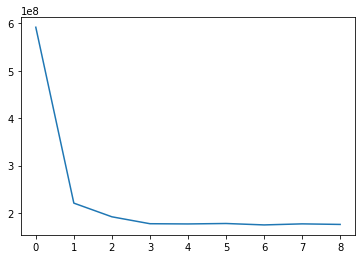

In [41]:
fig = plt.figure()
plt.plot(distances)
fig.savefig("./clusters/mejor_n/Primer_Clusters")

**Recordar que el eje x debe desplazarse una unidad** 
El mejor numero de cluster es 4

In [44]:
n_clusters = 1
centroids2, los_demas = k_means_clust(time_series,n_clusters,5, column = "kwh_consumido",w =2)
for i in centroids2:
    
    plt.plot(i)

plt.show()

0     83519.904463
1    117111.904372
2    157849.743888
3    169218.309251
4              NaN
5              NaN
6              NaN
Name: kwh_consumido, dtype: float64
0    3987.992
1         NaN
2         NaN
Name: kwh_consumido, dtype: float64


TypeError: list indices must be integers or slices, not NoneType

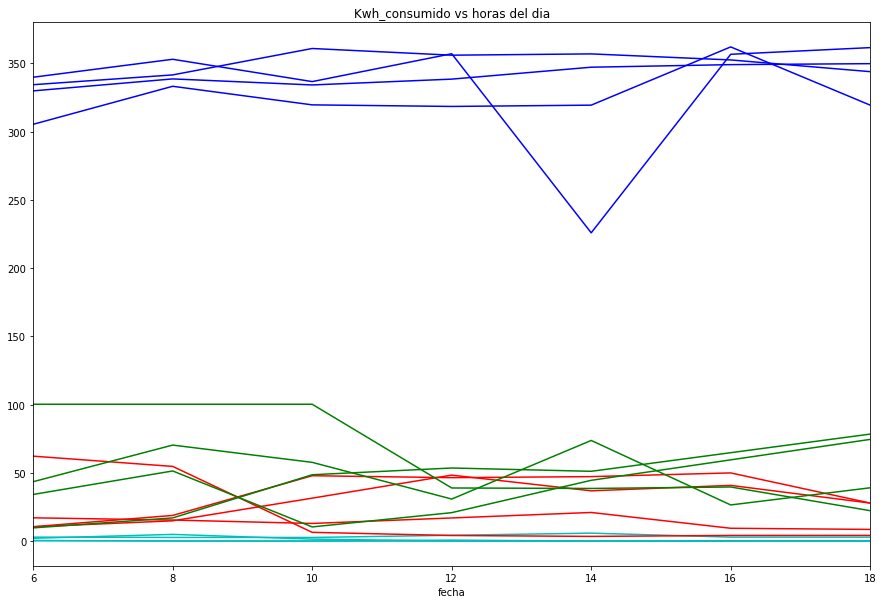

In [24]:
fig = plt.figure(figsize = (15,10))

for key in (los_demas):
    indexes = los_demas[key].copy()
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes[:4]:
        serie2 = time_series[i].copy()
        serie2.index = serie2.index.hour 
        #serie2 = (serie2 - serie2.min() )/(serie2.max() - serie2.min())
        #serie2 = (serie2 - serie2.mean() )/(serie2.std())
        serie2.plot(c = c, title = "Kwh_consumido vs horas del dia")
        
    

In [66]:
los_demas.keys()

dict_keys([1, 3, 0, 2])

In [21]:
new_clusters = []

In [25]:
new_dict = {}
fig = plt.figure()
for key in (los_demas):
    print("para la llave: " +  str(key))
    
    cluster_indexes = los_demas[key]
    new_serie = []
    for i in cluster_indexes:
        new_serie.append(time_series[i])
    '''
    distances2 = []
    for n in range(1,8):
        centroids, indicesTimeSeries = k_means_clust(new_serie,n,5,3)
        d = sse(centroids,indicesTimeSeries, new_serie )
        distances2.append(d)
    print("finalizo " + str(key) + "s")
    fig = plt.figure()
    plt.plot(distances2)
    fig.savefig("./clusters/mejor_n/" + str(key))
    '''
    c, w = k_means_clust(new_serie,4,5,2)
    new_dict[key] = [new_serie, c, w]
    #fig = plt.figure()
    #plt.title = "From Cluster # " + str(key)
    #for i in c:
        
        #plt.plot(i)

        #plt.show()


    

para la llave: 3
para la llave: 2
para la llave: 0
para la llave: 1


<Figure size 432x288 with 0 Axes>

**Recordar desplazar el eje de las x dos unidades**

In [26]:
alto_voltaje = new_dict[2]
medio_voltaje = new_dict[3]
bajo_voltaje = new_dict[1]
muy_bajo = new_dict[0]


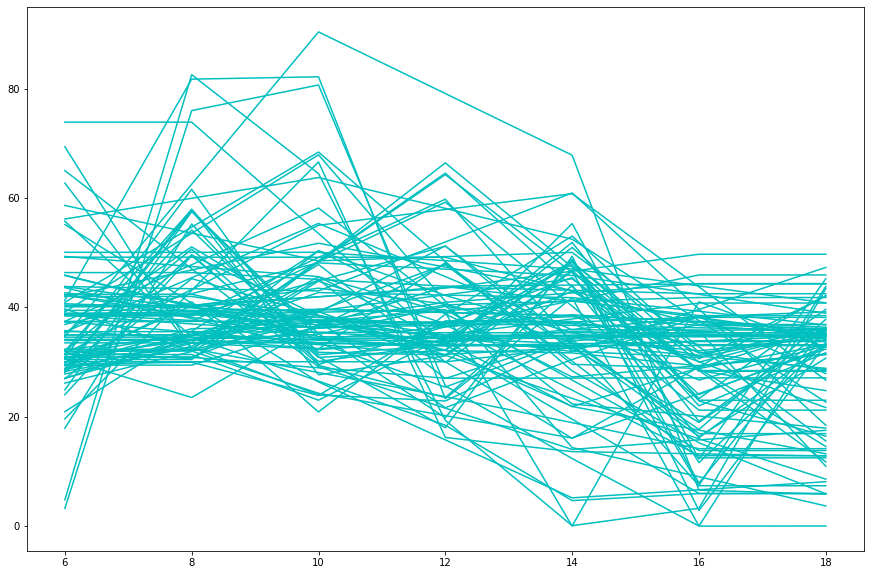

In [35]:
fig = plt.figure(figsize = (15,10))
km = new_dict[2]
ts = km[0]
for key in (km[2]):
        if(key == 3):

            indexes = km[2][key].copy()
            if(key == 0):
                c = "b"
            elif(key == 1):
                c = "g"
            elif(key == 2):
                c = "r"
            elif(key == 3):
                c = "c"
            else:
                c = "m"
            for i in indexes[:100]:
                serie = ts[i].copy()
                serie.index = serie.index.hour
                #serie = (serie - serie.min() )/(serie.max() - serie.min())
                plt.plot(serie, c = c)


In [ ]:
fig = plt.figure(figsize = (15,10))
ts = medio_voltaje[0]
ks = medio_voltaje[2]
for key in (ks):
    
    indexes = ks[3]
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes[:3]:
        serie = ts[i]
        
        serie = (serie - serie.mean()) / (serie.max() - serie.min())
        
        #serie = (serie - serie.min() )/(serie.max() - serie.min())
        plt.plot(serie, c = c)
    